In [1]:
# TEST PERFORMANCES

In [2]:
from pymongo import MongoClient
import copy
import mysql.connector
import time
import random
import matplotlib.pyplot as plt

# Paramètres de la connexion à MongoDB
host = 'localhost'
port = 27017

# Connexion à MongoDB
client = MongoClient(host, port)
db = client['f1_test']
collection = db['races']

# Connexion à MySQL
conn = mysql.connector.connect(
  host="localhost",
  user="admin",
  password="admin"
)
cursor = conn.cursor()

In [3]:
# BASE DE DONNÉES MySQL

In [4]:
cursor.execute("""
CREATE DATABASE IF NOT EXISTS f1_test;
""")

cursor.execute("""
USE f1_test
""")

In [5]:
# TABLES MySQL

In [6]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Races (
id INT PRIMARY KEY,
year INT NOT NULL,
country VARCHAR(255) NOT NULL,
city VARCHAR(255) NOT NULL,
duration INT NOT NULL,
lapsCompleted INT NOT NULL,
fastestDriver VARCHAR(255) NOT NULL
);
""")

# création de la table Standings
cursor.execute("""
CREATE TABLE IF NOT EXISTS Standings (
id INT PRIMARY KEY AUTO_INCREMENT,
race_id INT NOT NULL,
driver VARCHAR(255) NOT NULL,
team VARCHAR(255) NOT NULL,
FOREIGN KEY (race_id) REFERENCES Races(id)
);
""")

In [7]:
# GÉNÉRATION DE DONNÉES

In [8]:
def createMongoDocument():
    document = {}
    countries = [
         "Barhain", "Saudi Arabia", "Australia", "Italy", "United States",
         "Spain", "Monaco", "Azerbaijan", "Canada", "Great Britain",
         "Autria", "France", "Hungary", "Belgium", "Netherlands",
         "Singapore", "Japan", "Mexico", "Brazil", "United Arab Emirates"
    ]
    cities = [
        "Sakhir", "Jeddah", "Melbourne", "Imola", "Miami",
        "Barcelona", "Monaco", "Baku", "Montreal", "Silverstone",
        "Spielberg", "Le Castellet", "Budapest", "Spa-Francorchamps", "Zandvoort",
        "Monza", "Singapore", "Suzuka", "Austin", "Mexico City", "Sao Paulo", "Abu Dhabi"
    ]
    
    document['year'] = random.randint(2017,2023)
    document['country'] = countries[random.randint(0, len(countries)-1)]
    document['city'] = cities[random.randint(0, len(cities)-1)]
    document['duration'] = random.randint(5000000,6000000)
    document['lapsCompleted'] = random.randint(50,70)
    
    standings = []
    for i in range(20):
        doc = {}
        drivers = [
            {'driver': 'Verstappen', 'team': 'Red Bull'},
            {'driver': 'Perez', 'team': 'Red Bull'},
            {'driver': 'Leclerc', 'team': 'Ferrari'},
            {'driver': 'Sainz', 'team': 'Ferrari'},
            {'driver': 'Hamilton', 'team': 'Mercedes'},
            {'driver': 'Russel', 'team': 'Mercedes'},
            {'driver': 'Ocon', 'team': 'Alpine'},
            {'driver': 'Alonso', 'team': 'Alpine'},
            {'driver': 'Norris', 'team': 'McLaren'},
            {'driver': 'Ricciardo', 'team': 'McLaren'},
            {'driver': 'Gasly', 'team': 'Alpha Tauri'},
            {'driver': 'Tsunoda', 'team': 'Alpha Tauri'},
            {'driver': 'Magnussen', 'team': 'Haas'},
            {'driver': 'Schumacher', 'team': 'Haas'},
            {'driver': 'Stroll', 'team': 'Aston Martin'},
            {'driver': 'Vettel', 'team': 'Aston Martin'},
            {'driver': 'Albon', 'team': 'Williams'},
            {'driver': 'Latifi', 'team': 'Williams'},
            {'driver': 'Bottas', 'team': 'Alfa Romeo'},
            {'driver': 'Zhou', 'team': 'Alfa Romeo'}
        ]

        doc = drivers.pop(random.randint(0, len(drivers)-1))
        standings.append(doc)
    
        if i == 0:
            document['fastestDriver'] = doc['driver']
  
    document['standings'] = standings
    
    return document

def createMySQLQueries(_id_):
    queries_standings = []
    query_race = ""
    
    countries = [
         "Barhain", "Saudi Arabia", "Australia", "Italy", "United States",
         "Spain", "Monaco", "Azerbaijan", "Canada", "Great Britain",
         "Autria", "France", "Hungary", "Belgium", "Netherlands",
         "Singapore", "Japan", "Mexico", "Brazil", "United Arab Emirates"
    ]
    cities = [
        "Sakhir", "Jeddah", "Melbourne", "Imola", "Miami",
        "Barcelona", "Monaco", "Baku", "Montreal", "Silverstone",
        "Spielberg", "Le Castellet", "Budapest", "Spa-Francorchamps", "Zandvoort",
        "Monza", "Singapore", "Suzuka", "Austin", "Mexico City", "Sao Paulo", "Abu Dhabi"
    ]
    
    year = random.randint(2017,2023)
    country = countries[random.randint(0, len(countries)-1)]
    city = cities[random.randint(0, len(cities)-1)]
    duration = random.randint(5000000,6000000)
    lapsCompleted = random.randint(50,70)
    fastestDriver = ""
    
    for i in range(20):
        drivers = [
            {'driver': 'Verstappen', 'team': 'Red Bull'},
            {'driver': 'Perez', 'team': 'Red Bull'},
            {'driver': 'Leclerc', 'team': 'Ferrari'},
            {'driver': 'Sainz', 'team': 'Ferrari'},
            {'driver': 'Hamilton', 'team': 'Mercedes'},
            {'driver': 'Russel', 'team': 'Mercedes'},
            {'driver': 'Ocon', 'team': 'Alpine'},
            {'driver': 'Alonso', 'team': 'Alpine'},
            {'driver': 'Norris', 'team': 'McLaren'},
            {'driver': 'Ricciardo', 'team': 'McLaren'},
            {'driver': 'Gasly', 'team': 'Alpha Tauri'},
            {'driver': 'Tsunoda', 'team': 'Alpha Tauri'},
            {'driver': 'Magnussen', 'team': 'Haas'},
            {'driver': 'Schumacher', 'team': 'Haas'},
            {'driver': 'Stroll', 'team': 'Aston Martin'},
            {'driver': 'Vettel', 'team': 'Aston Martin'},
            {'driver': 'Albon', 'team': 'Williams'},
            {'driver': 'Latifi', 'team': 'Williams'},
            {'driver': 'Bottas', 'team': 'Alfa Romeo'},
            {'driver': 'Zhou', 'team': 'Alfa Romeo'}
        ]
        
        doc = drivers.pop(random.randint(0, len(drivers)-1))
        driver = doc["driver"]
        team = doc["team"]
        race_id = _id_
        queries_standings.append("INSERT INTO Standings (race_id, driver, team) VALUES ({}, '{}', '{}')".format(race_id, driver, team))
        
        if i == 0:
            fastestDriver = copy.deepcopy(driver)
            
    query_race = "INSERT INTO Races (id, year, country, city, duration, lapsCompleted, fastestDriver) VALUES ({}, {}, '{}', '{}', {}, {}, '{}')".format(_id_, year, country, city, duration, lapsCompleted, fastestDriver)
    
    return query_race, queries_standings
    

In [9]:
# INSERTION MONGO
nb = 500

In [10]:
n_mongo = []
seconds_mongo = []
def mongo_insertion(nb):
    docs = [createMongoDocument() for i in range(nb)]
    start_time = time.time()
    for i in range(nb):
        document = docs[i]
        collection.insert_one(document)
        n_mongo.append(i)
        seconds_mongo.append((time.time() - start_time))
        
    print(i+1, "insertions effectuées.")

# Mesure du temps
start_time = time.time()
mongo_insertion(nb)
end_time = time.time()
time_mongo = end_time - start_time

# Affichage du temps d'exécution
print("Temps d'exécution : {} secondes".format(time_mongo))

500 insertions effectuées.
Temps d'exécution : 0.9598865509033203 secondes


In [11]:
# INSERTION MYSQL

In [12]:
cursor.execute("DELETE FROM Standings")
cursor.execute("DELETE FROM Races")

n_mysql = []
seconds_mysql = []

def mysql_insertion(nb):
    
    queries_r = []
    queries_s = []
    for i in range(nb):
        race,standings = createMySQLQueries(i)
        queries_r.append(race)
        queries_s.append(standings)
    start_time = time.time()
    
    for i in range(len(queries_r)):
        
        cursor.execute(queries_r[i])
        for j in queries_s[i]:
            cursor.execute(j)
        
        n_mysql.append(i)
        seconds_mysql.append((time.time() - start_time))
        
    print(i+1, "insertions effectuées.")

# Mesure du temps
start_time = time.time()
mysql_insertion(nb)
end_time = time.time()
time_mysql = end_time - start_time

# Affichage du temps d'exécution
print("Temps d'exécution : {} secondes".format(time_mysql))

500 insertions effectuées.
Temps d'exécution : 11.960264205932617 secondes


In [13]:
# GRAPHIQUE

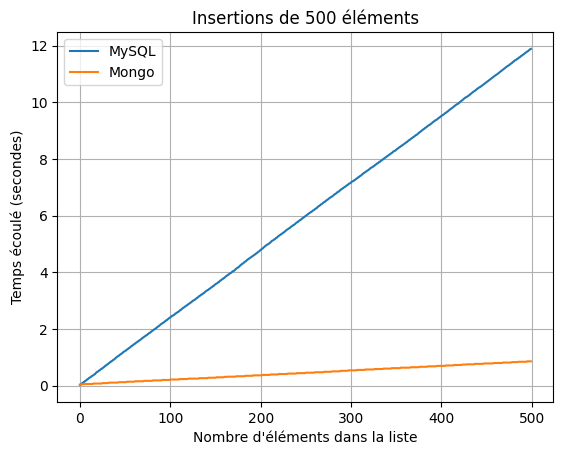

In [14]:
# Plot des données MySQL (en utilisant une autre couleur de ligne)
plt.plot(n_mysql, seconds_mysql, label='MySQL')

# Plot des données MongoDB
plt.plot(n_mongo, seconds_mongo, label='Mongo')

# Configurer les axes et le titre
plt.ylabel('Temps écoulé (secondes)')
plt.xlabel('Nombre d\'éléments dans la liste')
plt.title("Insertions de 500 éléments")

# Afficher la légende
plt.legend()

# Afficher la grille
plt.grid()

# Afficher le graphique
plt.show()

In [20]:
print("MongoDB est {}x plus rapide lors de l'insertion".format(int(time_mysql/time_mongo)))

MongoDB est 12x plus rapide lors de l'insertion
